In [176]:
import numpy as np
from astropy import units as u
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
from scipy.stats import uniform

# Units

In [140]:
#G_phy = 6.8e-8*u.cm*u.cm*u.cm/u.s/u.s/u.g
#G_iu = 1

#r_iu = 1 * u.au
#r_phy = r_iu.to(u.cm)

#M_iu = 1 * u.M_sun
#M_phy = M_iu.to(u.g)

#v_phy = np.sqrt(G_phy * M_phy / r_phy).to(u.km/u.s)
#t_phy = (r_phy / v_phy).to(u.yr)
#density_phy = (M_phy / (4/3 * np.pi * r_phy**3)).to(u.g/u.cm**3)
#a_phy = (G_phy * M_phy / r_phy**2).to(u.cm/u.s**2)

#E_phy = G_phy*(M_phy**2)/r_phy #cm^2 g s^-2 = erg

Values

In [141]:
# ---- 100 body with R = 1.5e15 cm , m = 2e33 g ----

#R_halo = 1e20
#m_points = 2e33
N_dim = 3

In [142]:
N = 1000
G_p = 6.67*10**(-8)*u.cm**3/(u.g*u.s**2)
G_iu = 1

# radius:
r_iu = 1*u.pc
r_p = r_iu.to(u.cm)

# mass:
M_iu = 1*u.M_sun
M_p = M_iu.to(u.g)

# my values:
m_points = 3*M_iu
R_halo = 90*r_iu

# scale factor :
b = 45


# the density of the cluster is given by:
rho_iu = N*(m_points/M_iu)/((4*np.pi*(R_halo/r_iu)**3)/3)
rho_p = N*M_p/((4*np.pi*(R_halo.to(u.cm))**3)/3)

# compute the collapse time:
cost = np.sqrt(3*np.pi/32)
tc_iu = cost/np.sqrt(G_iu*rho_iu)
tc_p = cost/np.sqrt(G_p*rho_p)

print("The mass of the stars - so my test particles - (in internal units) is: ", m_points/M_iu)
print("The radius of the cluster (in internal units) is: ", R_halo/r_iu)
print("The density of the cluster (in internal units) is: ", rho_iu)
print("The density of the cluster (in physical units) is: ", rho_p)
print("The collapse time (in internal units) is: ", tc_iu)
print("The collapse time (in physical units) is: ", tc_p)

The mass of the stars - so my test particles - (in internal units) is:  3.0
The radius of the cluster (in internal units) is:  90.0
The density of the cluster (in internal units) is:  0.0009824379203203417
The density of the cluster (in physical units) is:  2.216348943565359e-26 g / cm3
The collapse time (in internal units) is:  17.314422707185166
The collapse time (in physical units) is:  1.4114925461415804e+16 s


# Random generation through spherical symmetry

In [143]:
def random_points(radius):
    
    #theta = np.arccos(np.random.uniform(-1, 1))  
    #phi = np.random.uniform(0, 2*np.pi)     
    
    p =  np.random.uniform(0, 1, N)
    r = b * p**(1/3) * (1-p**(2/3))**(-1/2)
    phi = np.random.uniform(0, 1, N) * (2*np.pi)
    theta = np.arccos(1 - 2*np.random.uniform(0, 1, N))
    
    #if we want bigger density towards the center
    
    #r = np.random.power(0.98) * radius
    #x = r * np.sin(theta) * np.cos(phi)
    #y = r * np.sin(theta) * np.sin(phi)
    #z = r * np.cos(theta)
    
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)

    return r, x, y, z

# output: coordinates as tuple
n_points = [random_points(R_halo) for _ in range(N)]
#print(n_points[0])

# output: coordinates as single vectors
#x_p = []
#y_p = []
#z_p = []

for _ in range(N):
    r, x, y, z = random_points(R_halo/u.pc)
    #x_p.append(x)
    #y_p.append(y)
    #z_p.append(z)


Plots

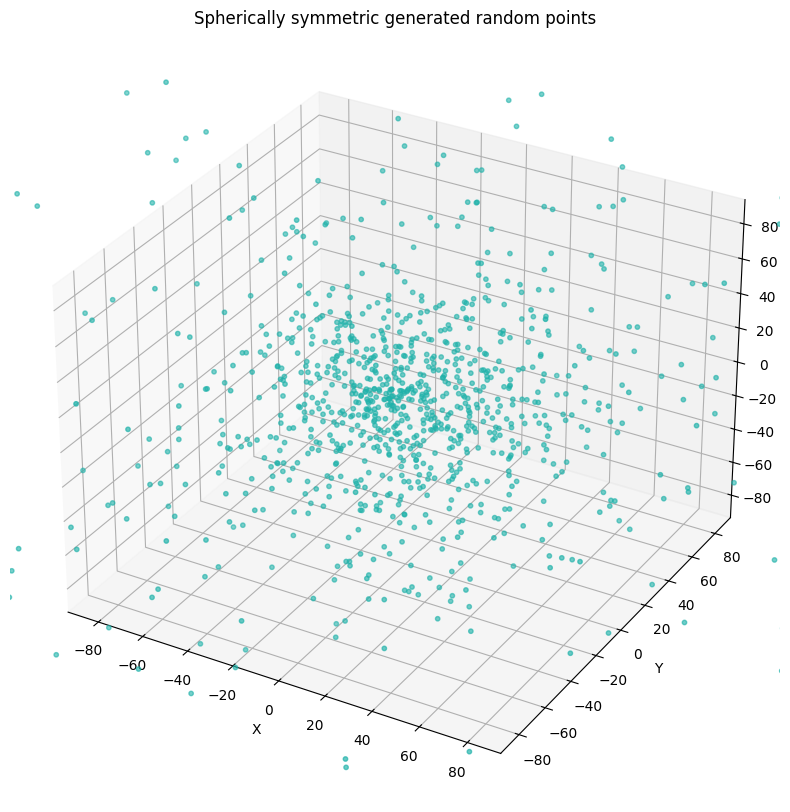

In [144]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")
#ax.scatter(x_p, y_p, z_p, color='black', s=10)
ax.scatter(x, y, z, color='lightseagreen', s=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-90,90)
ax.set_ylim(-90,90)
ax.set_zlim(-90,90)


ax.set_title('Spherically symmetric generated random points')
plt.show()

# Sampling the velocities: Monte Carlo rejection method

q = v / (2 * phi)**(1/2) 

q va da 0 a 1 !!
 

## I need to get the potential

It is of the form
$$\Phi = -\frac{M}{(b^2+r^2)^{1/2}}$$
where we set $G = 1$ in our internal units.where we set $G = 1$ in our internal units.

In [182]:
pot =  -1 * N*m_points / (b**2 + r**2)**(1/2)

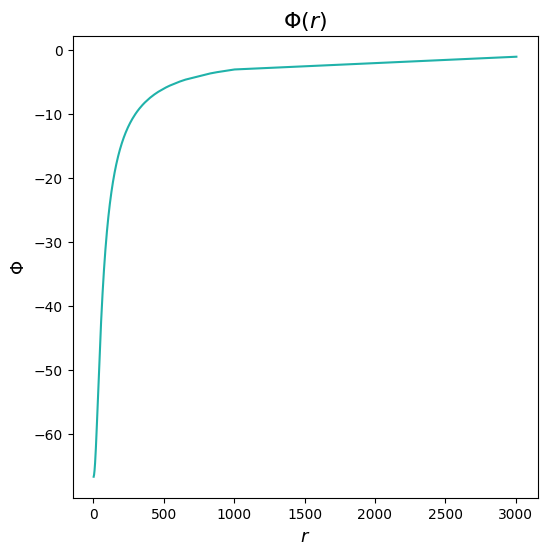

In [183]:
# plot:
plt.figure(figsize = (6,6))
plt.plot(r[np.argsort(r)], pot[np.argsort(r)], c='lightseagreen')
plt.title(r"$\Phi(r)$", fontsize=16)
plt.xlabel(r"$r$", fontsize=13)
plt.ylabel("$\Phi$", fontsize=13)
plt.margins(0.05, 0.05)
plt.show()

## escape velocity

In [184]:
v_esc = (2 * (-1 * pot))**(1/2) * u.solMass**(-1/2)
print(v_esc)

[ 8.15310922 11.26047828  9.91886839  8.71208124 10.94907839  9.08160531
 10.11413413  7.31980508  6.65734129  7.88623285  9.99642819  9.24641649
  8.47482794  6.79169819  8.15020021  6.29714896 10.64756811  9.62185056
  7.13513783  6.45322812  9.52326795  9.17200543  7.9577799   9.63571437
  9.58130406  5.70186423  9.45724573  7.29811921  5.4753408   7.42479376
 10.3387739   8.04903424  6.87564369 10.21168229  6.11678446  9.28984275
 11.24808214  8.22218944 10.98939209  7.51927858  9.92964152  9.24933517
  7.19435919 10.24206315  6.93120659  9.96671655  6.03203347  6.74734706
 10.69738455 11.3560799   8.2104919  10.40137049  6.22804147 11.51938803
 10.9392391   8.83143184 10.41109293 11.2483831   9.00852434  7.74255375
  4.26102407  7.21795103  6.34325589  9.61123203  4.16910366 10.79995978
  8.31570324 10.61522538 10.35487715  9.2080362  11.51839605  6.4441255
  7.79728917 11.5178741   6.97527194  9.49024481 10.36277796  9.93591843
  8.7626391   5.42009514  7.21707155 10.26259469  8.

## rejection sampling

In [185]:
def f_x (q):
    return (1 - q**2)**(7/2) * q**2 
def g_x(f_max):
    return f_max

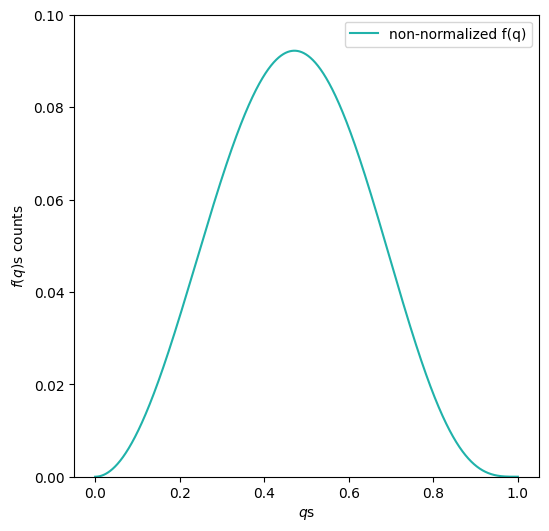

In [186]:
# I take N q between 0 and 1
number_of_qs = 3*N

q_grid = np.linspace (0, 1, number_of_qs)

plt.figure(figsize = (6,6))

plt.plot(q_grid, f_x(q_grid), label="non-normalized f(q)", color='lightseagreen')
plt.xlabel("$q$s")
plt.ylabel("$f(q)$s counts")
plt.ylim(0, 0.1)
plt.legend(loc='upper right', fontsize='medium')
plt.show()

(0.04295146206444051, 7.0437228207492196e-09)


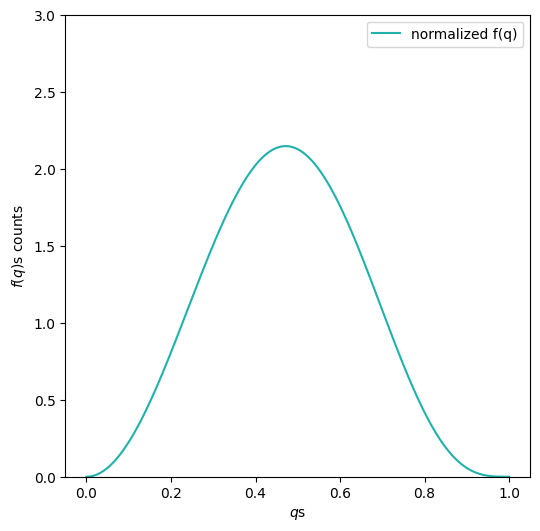

In [187]:
import scipy.integrate as integrate

import scipy.special as special

result = integrate.quad(lambda q_grid: f_x(q_grid), 0, 1)
print(result)
fq_normalized = f_x(q_grid) * 1/result[0]

plt.figure(figsize = (6,6))

plt.plot(q_grid, fq_normalized, label="normalized f(q)", color='lightseagreen')
plt.xlabel("$q$s")
plt.ylabel("$f(q)$s counts")
plt.ylim(0, 3)
plt.legend(loc='upper right', fontsize='medium')
plt.show()



In [188]:
#f_max = np.max(f_x(q_grid))

f_max = np.max(fq_normalized)

#let's generate y in [0, g(x)] 
y = np.random.uniform(0, g_x(f_max),number_of_qs)
y_accepted = []
for i in range(number_of_qs):
    #if y[i] <= f_x(q_grid[i]):
    if y[i] <= fq_normalized[i]:

        y_accepted.append(q_grid[i])

print(len(r), len(y), len(y_accepted))

1000 3000 1381


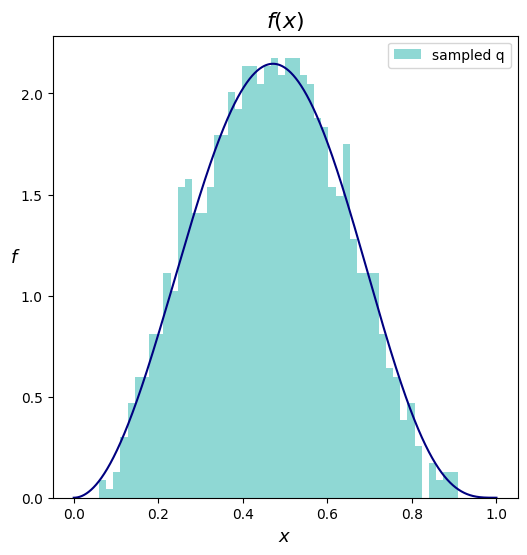

In [189]:
plt.figure(figsize = (6,6))
plt.plot(q_grid, fq_normalized, c='navy')
plt.hist(y_accepted, 50, density=True, color='lightseagreen', alpha=0.5, label='sampled q')

plt.title("$f(x)$", fontsize=16)
plt.xlabel("$x$", fontsize=13)
plt.ylabel("$f$", fontsize=13, rotation=0)
#plt.margins(0.05, 0.05)
plt.legend();

### qui ho un problema: come associo ad un potenziale ( e quindi un raggio) la velocità? a caso? taglio il vettore v_esc casualmente??

In [190]:
from sklearn.utils import shuffle

y_accepted = np.array(y_accepted)
q_sample = shuffle(y_accepted)

q_ok = q_sample[:N]

v = q_ok * v_esc

print(v)

[3.76527385 7.46067701 6.83637912 3.97693872 6.45845938 2.23481985
 2.53274916 2.9874763  2.05336468 3.75509853 2.78660019 3.82620969
 4.99616399 3.11842895 0.92399736 4.69713979 3.99061906 1.54963449
 3.89232594 2.70695598 3.1500773  4.92700925 2.61898258 3.81380225
 5.69319234 2.47733547 1.94568877 6.5218271  3.81758507 3.41654398
 3.03371825 2.71342901 4.14281032 3.66721635 3.97111682 6.45239828
 7.94004331 3.36125517 4.9542041  4.03418448 4.90356755 1.66851962
 3.91023857 4.76414741 2.05232126 6.05846091 4.7709181  3.49179148
 6.57751821 7.95947981 4.86223195 5.48681831 3.31442287 4.10611064
 7.33538174 4.02847574 2.74597349 5.29975502 5.00139814 4.16171946
 1.93372916 1.51386836 1.88246007 5.43856644 2.2270437  4.31422201
 4.92731066 2.40692006 4.22965139 4.19719423 3.77545292 3.16082314
 4.50053603 2.74600866 2.89337722 5.59161807 3.86314964 4.99943345
 4.73048106 3.5405023  3.49904036 6.73792896 2.66529675 1.35348455
 5.82910007 2.69648402 4.55795119 7.91225212 4.69148135 5.2672

In [191]:
#defining thetha and phi:
phi = np.random.uniform(0, 1, N) * (2*np.pi)
theta = np.arccos(1 - 2*np.random.uniform(0, 1, N))


v_x = v * np.sin(theta) * np.cos(phi)
v_y = v * np.sin(theta) * np.sin(phi)
v_z = v * np.cos(theta)

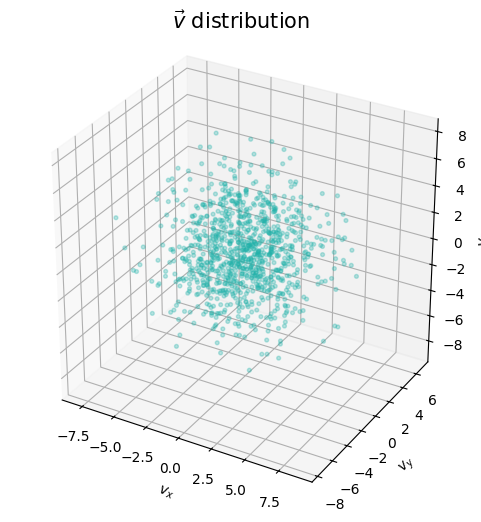

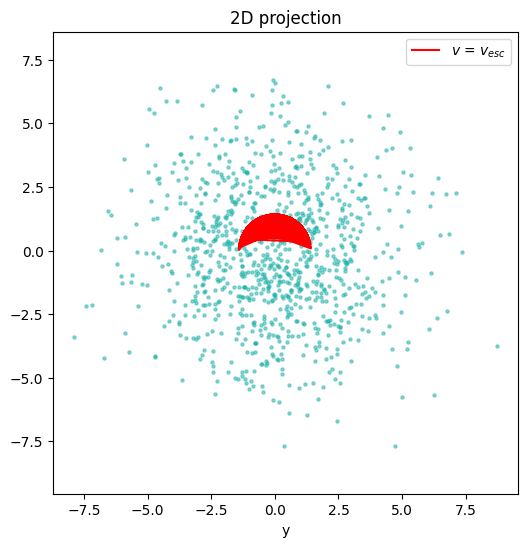

In [193]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(v_x, v_y, v_z, c = 'lightseagreen', s=7.5, alpha=0.3)
ax.set_aspect('equal')
ax.set_xlabel('$v_x$')
ax.set_ylabel('$v_y$')
ax.set_zlabel('$v_z$')
ax.set_title(r'$\vec{v}$ distribution', fontsize=15)
#ax.set_xlim(-13, 13)
#ax.set_ylim(-13, 13)
#ax.set_zlim(-13, 13)
plt.show();

plt.figure(figsize = (6,6))
a = np.sqrt(2) * np.cos( theta )  # 1 is v = v_esc
c = np.sqrt(2) * np.sin( theta )
plt.scatter(v_x,v_y, c='lightseagreen', s=5, alpha=0.5)
plt.plot(a, c, c='red', label='$v$ = $v_{esc}$')
plt.axis('equal')
#plt.xlim(-1.5,1.5)
#plt.ylim(-1.5,1.5)
plt.xlabel('x')
plt.xlabel('y')
plt.title('2D projection')
plt.legend();

# Writing on file

In [194]:
#def w_onfile(filename, num_points, radius, masses, dimension, x, y, z):
 #   with open(filename, 'w') as file:
  #      file.write(f'  {num_points} \n  {dimension} \n  {0}  \n')
   #     for i in range(num_points):
    #        file.write(f'  {(masses/M_iu).value}  \n')
     #   for i in range(num_points):
      #      file.write(f'  {(x[i]/r_iu).value}  {(y[i]/r_iu).value}  {(z[i]/r_iu).value}  \n')
       # for i in range(num_points):
            #file.write(f'  {(vx[i]/v_iu).value}  {(vy[i]/v_iu).value}  {(vz[i]/v_iu).value}  \n')
        #    file.write(f'  {0}  {0}  {0}  \n')
            
#filename = 'treecode_in.txt'

#w_onfile(filename, N, R_halo, m_points, N_dim, x, y, z)

In [195]:
def w_onfile(filename, num_points, radius, masses, dimension, x, y, z):
    with open(filename, 'w') as file:
        file.write(f'  {num_points} \n  {dimension} \n  {0}  \n')
        for _ in range(num_points):
            file.write(f'  {(masses/M_iu).value}  \n')
        for i in range(num_points):
            file.write(f'  {x[i]}  {y[i]}  {z[i]}  \n')
        for i in range(num_points):
            #file.write(f'  {(vx[i]/v_iu).value}  {(vy[i]/v_iu).value}  {(vz[i]/v_iu).value}  \n')
            file.write(f'  {v_x[i]}  {v_y[i]}  {v_z[i]} \n')
            
filename = 'treecode_in_4_1000bodies.txt'

w_onfile(filename, N, R_halo, m_points, N_dim, x, y, z)

# let's calculate the timestep

In [196]:
#x at which we want to arrive, it has to be greter than softening
softening = 0.5
x_min = softening * 10

r_fortime = np.linspace(0, r_p/r_iu, 1000)
#acceleration in function of r:
a = G_iu * rho_iu *r_fortime * 4/3 * np.pi 
#print(a)

In [197]:
timestep = 0.001 * np.sqrt(x_min/max(a))
print(timestep, "internal units")

0.034856850115866755 internal units


In [100]:
print("run: ./treecode in=treecode_in_4.txt out=treecode_out_4.txt dtime=0.001 eps=%f theta=0.1 tstop=10 dtout=0.1
 ", %softening, )

SyntaxError: unterminated string literal (detected at line 1) (2794711524.py, line 1)